In [14]:
from CompilerQC import *
import pickle
from pathlib import Path
import os
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [15]:
# group settings by hand
results = []
for number in [1, 2]:
    for idx, name in enumerate(os.listdir(paths.parameters_path / f"run_{number}/dictionaries")):
        print(idx, name)
        results.append(name.split('.')[0])

0 McForLHZGraphs1.pkl
1 McForDatabase1.pkl
2 EnergyForLHZGraphs1.pkl
3 AdvancedMcForLHZGraphsWithCore1.pkl
0 AdvancedMcForLHZGraphsWithCore2.pkl
1 CoreMcForDatabase2.pkl
2 McForDatabaseWithCore2.pkl
3 EnergyForLHZWithCore2.pkl
4 EnergyForLHZGraphs2.pkl
5 McForDatabase2.pkl
6 CoreEnergyForDatabase2.pkl


In [16]:
df = dict()
for idx, name in enumerate(results):

    number = name[-1]
    dataframe = pd.read_csv(f"results_in_csvs/run_{number}/{name}.csv")
    dataframe['run'] = number
    dataframe['setting'] = name
    dataframe['qubit_ratio'] = dataframe.K / (dataframe.N / 2 * (dataframe.N - 1))
    dataframe['CNOT_ratio'] = dataframe.number_of_CNOTs / dataframe.number_of_CNOTs_in_LHZ
    if name[:-1] in list(df.keys()):
        df[name[:-1]] = df[name[:-1]].append(dataframe)
    else:
        df.update({name[:-1]: dataframe})

In [17]:
dataframe = pd.DataFrame()
for df_ in df.values():
    dataframe = dataframe.append(df_)

In [18]:
# from visualize_graphs import without_compilation
# import matplotlib as mpl
# fig, ax = plt.subplots(figsize=(10, 10))
# title = 'core vs no core'
# x_axis = 'N'
# ax = dataframe[np.logical_and(dataframe.core==False, dataframe.K != dataframe.N / 2 * (dataframe.N - 1))].groupby(x_axis).mean().plot(ax=ax, y='CNOT_ratio', label='no core',
#                                                                                                                                           marker="8",
#         linestyle='--',
#         lw=1,
#         alpha=1,
#         grid=False,
#         markersize=10,
#         markerfacecolor='w',
#         markeredgewidth=1.5,
#         color=['red', 'blue', 'lime', 'black', 'orange', 'cyan', 'magenta'],
#     )
# dataframe[np.logical_and(dataframe.core==True, dataframe.K != dataframe.N / 2 * (dataframe.N - 1))].groupby(x_axis).mean().plot(ax=ax,y='CNOT_ratio', label='core',
#                                                                                                                                     marker="8",
#         linestyle='--',
#         lw=1,
#         alpha=1,
#         grid=False,
#         markersize=10,
#         markerfacecolor='w',
#         markeredgewidth=1.5,
#         color=['blue'],
#     )



# ax.axhline(1, linestyle='--', dashes=(7, 3), lw=1, color='grey')


# problem_folder = 'training_set'
# legend_title=""
# compare=True
# if compare:
#     without_compilation(problem_folder).loc[:20]['CNOT_ratio'].plot(
#         ax=ax,
#         marker="8",
#         linestyle='--',
#         lw=1,
#         alpha=0.9,
#         title=title,
#         grid=False,
#         markersize=10,
#         markerfacecolor='w',
#         markeredgewidth=1.5,
#         color='grey',
#     )
# ax.text(11.3,0.8, 'non-compiled', color='grey', fontsize=15, alpha=0.7)

# ax.legend(
# ["no core", "core"],
# title = legend_title,
# title_fontsize = 15,
# borderpad = 1,
# labelspacing=1.3,
# fontsize=14,
# )
# ax.set_title(label=title, fontsize=15)
# ax.yaxis.set_label_coords(-0.2, .5)
# ax.set_xlabel(x_axis)
# ax.set_xticks([i for i in range(4, 21) if i%2==0])
# ax.set_yticks(np.arange(1, 4.2, .8))
# ax.xaxis.set_tick_params(labelsize=14)
# ax.yaxis.set_tick_params(labelsize=14)
# ax.set_yscale('log')
# #      ax.set_ylim(0, 10)
# ax.yaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
# ax.yaxis.set_minor_formatter(mpl.ticker.ScalarFormatter()) # <---- Added

# ax.set_ylabel(r'#CNOTs $\frac{compiled}{lhz}$', rotation=0, fontsize=15)

# ax.figure.savefig(paths.plots / f"Figures/result_plots/{title}_compare_{compare}.png", bbox_inches='tight')

In [19]:
plt.rcParams['text.usetex'] = False

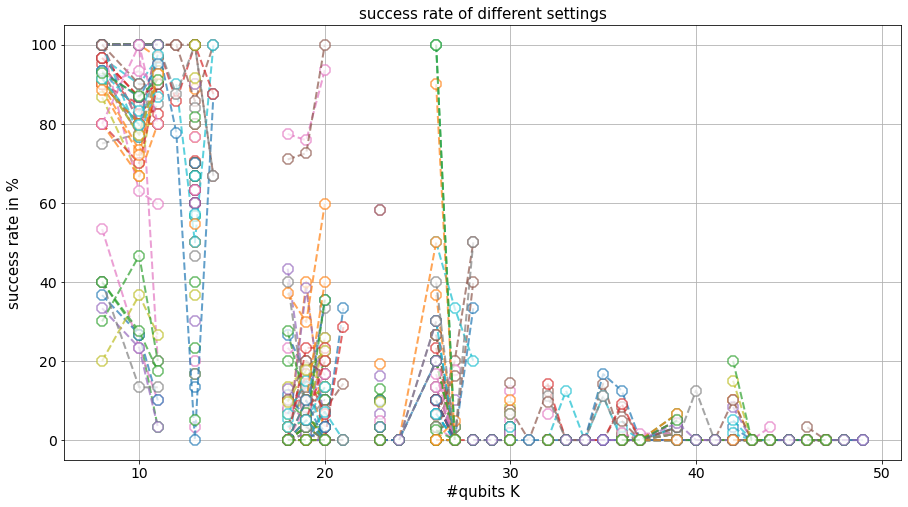

In [37]:
dataframe['success'] = (100 * ((dataframe.number_of_3er_plaquettes + dataframe.number_of_4er_plaquettes) >= 1 * dataframe.C)).to_list()
x_axis = 'K'
y_axis = 'success'
number_of_settings = dataframe['number_of_setting'].unique()
dataframe_ = dataframe[dataframe.K < 50]
# complete graphs == 1, else < 1
dataframe_ = dataframe_[dataframe_.qubit_ratio < 1]
df_ = dataframe_.loc[dataframe_['number_of_setting'].isin(number_of_settings)].groupby(['number_of_setting', 'setting', x_axis]).mean()
df_ = df_[df_.groupby(level=[0,1]).size() > 0]
df_ = df_.unstack().stack(dropna=False)
fig, ax = plt.subplots(figsize=(15, 8))
ax = df_.reset_index().pivot(x_axis,['number_of_setting','setting'],y_axis).plot(
    ax=ax,
    marker="8",
    linestyle='--',
    lw=2,
    alpha=0.7,
    grid=True,
    markersize=10,
    markerfacecolor='w',
    markeredgewidth=1.5,
    legend=False,
)
ax.set_ylabel(f'success rate in %', fontsize=15)
title = 'success rate of different settings'
ax.set_title(label=title, fontsize=15)
ax.yaxis.set_label_coords(-0.05, .5)

ax.set_xlabel('#qubits K', fontsize=15)
#ax.set_xticks([i for i in range(4, 21) if i%2==0])
ax.set_yticks([10 * i for i in range(0, 11) if i%2==0])
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
plt.savefig(paths.plots / f"Figures/result_plots/various_settings.pdf")


In [33]:
df_.unstack('K').stack(dropna=False)

N          C  original_C  \
number_of_setting setting                K                                      
0                 CoreEnergyForDatabase2 8    5.000000   4.000000    4.000000   
                                         10   6.000000   5.000000    5.000000   
                                         11   6.000000   6.000000    6.000000   
                                         12        NaN        NaN         NaN   
                                         13   7.000000   7.000000    7.000000   
                                         14        NaN        NaN         NaN   
                                         18  11.000000   8.000000    8.000000   
                                         19  10.000000  10.000000   10.000000   
                                         20  11.000000  10.000000   10.000000   
                                         21        NaN        NaN         NaN   
                                         23  12.000000  12.000000   12.000000   
                                         24        NaN        NaN         NaN   
                                         26  12.000000  15.000000   15.000000   
                                         27  15.000000  13.000000   13.000000   
                                         28        NaN        NaN         NaN   
                                         29        NaN        NaN         NaN   
                                         30  16.000000  15.000000   15.000000   
                                         31        NaN        NaN         NaN   
                                         32  15.000000  18.000000   18.000000   
                                         33        NaN        NaN         NaN   
                                         34        NaN        NaN         NaN   
                                         35        NaN        NaN         NaN   
                                         36  19.000000  18.000000   18.000000   
                                         37  16.000000  22.000000   22.000000   
                                         39  19.500000  20.500000   20.500000   
                                         40        NaN        NaN         NaN   
                                         41        NaN        NaN         NaN   
                                         42  18.500000  24.500000   24.500000   
                                         43  20.000000  24.000000   24.000000   
                                         44  20.000000  25.000000   25.000000   
                                         45        NaN        NaN         NaN   
                                         46  20.000000  27.000000   27.000000   
                                         47  20.000000  28.000000   28.000000   
                                         48        NaN        NaN         NaN   
                                         49        NaN        NaN         NaN   
                  CoreMcForDatabase2     8    5.000000   4.000000    4.000000   
                                         10   6.000000   5.000000    5.000000   
                                         11   6.000000   6.000000    6.000000   
                                         12        NaN        NaN         NaN   
                                         13   7.000000   7.000000    7.000000   
                                         14        NaN        NaN         NaN   
                                         18  11.000000   8.000000    8.000000   
                                         19  10.000000  10.000000   10.000000   
                                         20  11.000000  10.000000   10.000000   
                                         21        NaN        NaN         NaN   
                                         23  12.000000  12.000000   12.000000   
                                         24        NaN        NaN         NaN   
                                         26  12.000000  15.000000   15.000000   
   

In [34]:
df_

N          C  original_C  \
number_of_setting setting                K                                      
0                 CoreEnergyForDatabase2 8    5.000000   4.000000    4.000000   
                                         10   6.000000   5.000000    5.000000   
                                         11   6.000000   6.000000    6.000000   
                                         12        NaN        NaN         NaN   
                                         13   7.000000   7.000000    7.000000   
                                         14        NaN        NaN         NaN   
                                         18  11.000000   8.000000    8.000000   
                                         19  10.000000  10.000000   10.000000   
                                         20  11.000000  10.000000   10.000000   
                                         21        NaN        NaN         NaN   
                                         23  12.000000  12.000000   12.000000   
                                         24        NaN        NaN         NaN   
                                         26  12.000000  15.000000   15.000000   
                                         27  15.000000  13.000000   13.000000   
                                         28        NaN        NaN         NaN   
                                         29        NaN        NaN         NaN   
                                         30  16.000000  15.000000   15.000000   
                                         31        NaN        NaN         NaN   
                                         32  15.000000  18.000000   18.000000   
                                         33        NaN        NaN         NaN   
                                         34        NaN        NaN         NaN   
                                         35        NaN        NaN         NaN   
                                         36  19.000000  18.000000   18.000000   
                                         37  16.000000  22.000000   22.000000   
                                         39  19.500000  20.500000   20.500000   
                                         40        NaN        NaN         NaN   
                                         41        NaN        NaN         NaN   
                                         42  18.500000  24.500000   24.500000   
                                         43  20.000000  24.000000   24.000000   
                                         44  20.000000  25.000000   25.000000   
                                         45        NaN        NaN         NaN   
                                         46  20.000000  27.000000   27.000000   
                                         47  20.000000  28.000000   28.000000   
                                         48        NaN        NaN         NaN   
                                         49        NaN        NaN         NaN   
                  CoreMcForDatabase2     8    5.000000   4.000000    4.000000   
                                         10   6.000000   5.000000    5.000000   
                                         11   6.000000   6.000000    6.000000   
                                         12        NaN        NaN         NaN   
                                         13   7.000000   7.000000    7.000000   
                                         14        NaN        NaN         NaN   
                                         18  11.000000   8.000000    8.000000   
                                         19  10.000000  10.000000   10.000000   
                                         20  11.000000  10.000000   10.000000   
                                         21        NaN        NaN         NaN   
                                         23  12.000000  12.000000   12.000000   
                                         24        NaN        NaN         NaN   
                                         26  12.000000  15.000000   15.000000   
   